In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [101]:
raw_df = pd.read_excel(r'India Household Spending raw_file.xlsx')

In [102]:
raw_df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [103]:
raw_df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

In [104]:
income_df = raw_df[['Income','Age','Occupation','Disposable_Income','Desired_Savings','City_Tier']]

In [105]:
print(income_df.shape)
income_df.columns

(20000, 6)


Index(['Income', 'Age', 'Occupation', 'Disposable_Income', 'Desired_Savings',
       'City_Tier'],
      dtype='object')

In [106]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             20000 non-null  float64
 1   Age                20000 non-null  int64  
 2   Occupation         20000 non-null  object 
 3   Disposable_Income  20000 non-null  float64
 4   Desired_Savings    20000 non-null  float64
 5   City_Tier          20000 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 937.6+ KB


In [107]:
income_df.isnull().sum()

Income               0
Age                  0
Occupation           0
Disposable_Income    0
Desired_Savings      0
City_Tier            0
dtype: int64

In [108]:
income_df.duplicated().sum()

0

In [109]:
from sklearn.preprocessing import LabelEncoder

le_occ = LabelEncoder()
le_city = LabelEncoder()

income_df = income_df.copy()
income_df['Occupation_encoded'] = le_occ.fit_transform(income_df['Occupation'])
income_df['City_Tier_encoded'] = le_city.fit_transform(income_df['City_Tier'])

income_df= income_df.drop(['Occupation','City_Tier'],axis=1)

In [110]:
income_df.head()

,Income,Age,Disposable_Income,Desired_Savings,Occupation_encoded,City_Tier_encoded
0,44637.249636,49,11265.627707,6200.537192,2,0
1,26858.596592,34,9676.818733,1923.176434,1,1
2,50367.605084,35,13891.450624,7050.360422,3,2
3,101455.600247,21,31617.953615,16694.965136,2,2
4,24875.283548,52,6265.700532,1874.099434,0,1


In [111]:
occ_mapping = dict(zip(le_occ.classes_, le_occ.transform(le_occ.classes_)))
print("Occupation Mapping:", occ_mapping)

city_mapping = dict(zip(le_city.classes_, le_city.transform(le_city.classes_)))
print("City Tier Mapping:", city_mapping)

Occupation Mapping: {'Professional': 0, 'Retired': 1, 'Self_Employed': 2, 'Student': 3}
City Tier Mapping: {'Tier_1': 0, 'Tier_2': 1, 'Tier_3': 2}


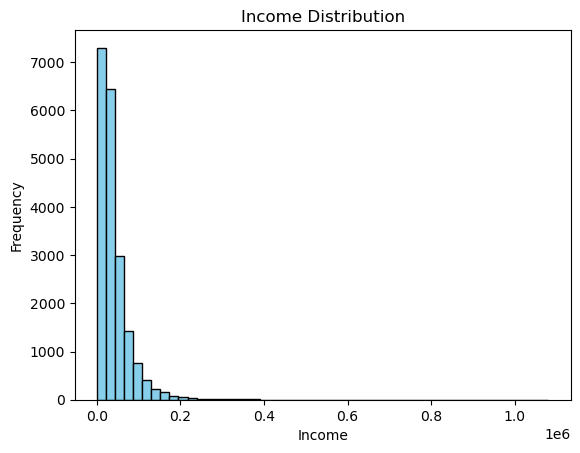

In [112]:
import matplotlib.pyplot as plt

plt.hist(income_df['Income'], bins=50, color='skyblue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


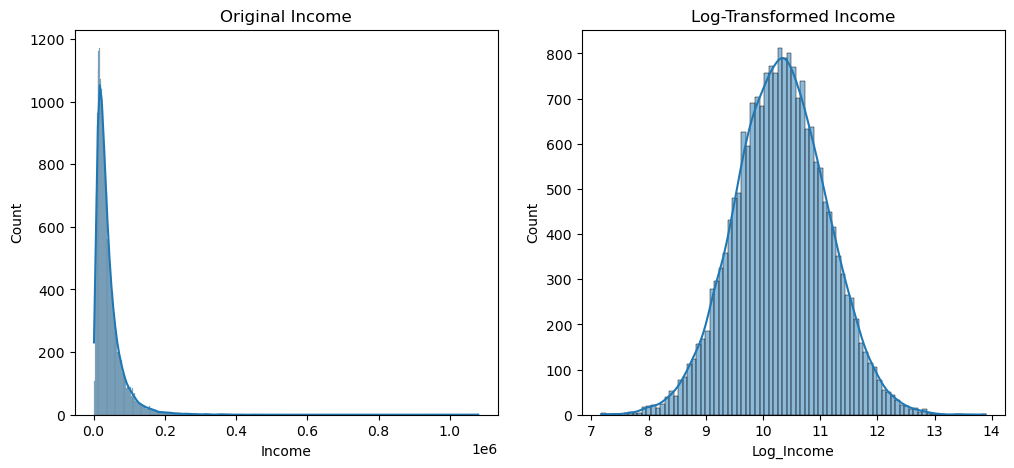

In [113]:
income_df['Log_Income'] = np.log1p(income_df['Income'])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(income_df['Income'], ax=ax[0], kde=True)
ax[0].set_title('Original Income')

sns.histplot(income_df['Log_Income'], ax=ax[1], kde=True)
ax[1].set_title('Log-Transformed Income')
plt.show()


In [114]:
from scipy.stats import zscore
income_df = income_df[(np.abs(zscore(income_df['Log_Income'])) < 3)]

In [115]:
income_df.Income.describe()

count     19944.000000
mean      41074.608159
std       36607.603167
min        2731.863205
25%       17643.528805
50%       30185.383480
75%       51660.627824
max      329954.912071
Name: Income, dtype: float64

In [116]:
income_df.head(2)

,Income,Age,Disposable_Income,Desired_Savings,Occupation_encoded,City_Tier_encoded,Log_Income
0,44637.249636,49,11265.627707,6200.537192,2,0,10.706346
1,26858.596592,34,9676.818733,1923.176434,1,1,10.198378


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X = income_df[['Log_Income']]  
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
wcss

[13362.000000000004,
 4825.886646125764,
 2464.306287104341,
 1525.2873780546956,
 1015.8774357721861,
 738.437528780494,
 558.7037353923367,
 429.6623572410514,
 353.7396542233168,
 292.01097820511103]

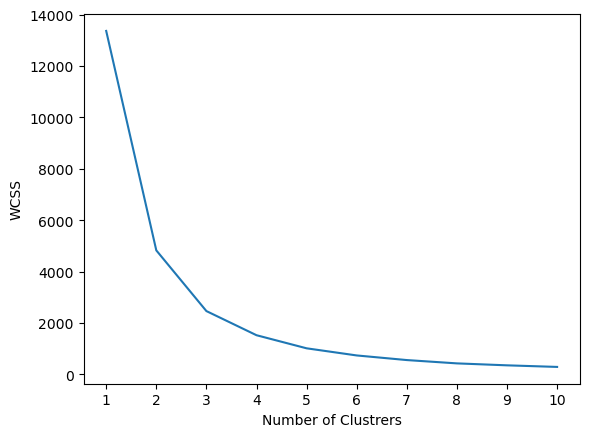

In [118]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [119]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow

3

In [120]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [121]:
silhouette_coefficients

[0.5505809011041847,
 0.5340873912031807,
 0.5201210087915057,
 0.5247842378854471,
 0.5195921829867739,
 0.5198440263163163,
 0.5211740988375707,
 0.5182881527236107,
 0.5183772274736401]

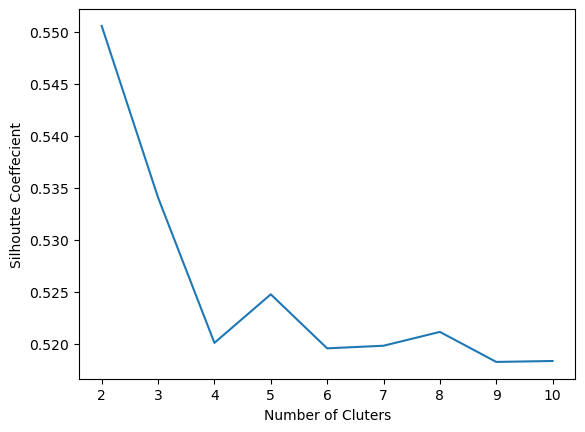

In [122]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

IncomeGroup
Medium    9056
Low       5660
High      5228
Name: count, dtype: int64


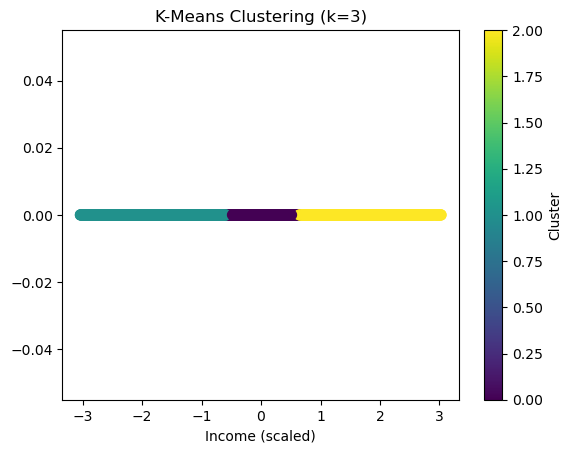

In [123]:
# Scale the entire dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(income_df[['Log_Income']])

# Fit KMeans on the entire dataset
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
kmeans.fit(X_scaled)

# Assign clusters
income_clusters = kmeans.predict(X_scaled)
income_df['IncomeCluster'] = income_clusters

# Label clusters based on cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
income_order = np.argsort(centers.flatten())
labels = ['Low', 'Medium', 'High']
income_df['IncomeGroup'] = income_df['IncomeCluster'].map(dict(zip(income_order, labels)))

# Count how many people fall into each cluster
cluster_counts = income_df['IncomeGroup'].value_counts()
print(cluster_counts)

# Optionally, visualize the clusters
plt.scatter(X_scaled[:, 0], [0]*len(X_scaled), c=income_clusters, cmap='viridis', s=50)
plt.xlabel('Income (scaled)')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.colorbar(label='Cluster')
plt.show()


In [124]:
# Print the cluster centers in the original income scale (after inverse transformation)
print("Cluster Centers (Original Scale):")
print(centers)

# Print the mapping of clusters to IncomeGroup labels
print("Cluster to IncomeGroup Mapping:")
print(dict(zip(income_order, labels)))


Cluster Centers (Original Scale):
[[10.33748138]
 [ 9.37131714]
 [11.30292425]]
Cluster to IncomeGroup Mapping:
{1: 'Low', 0: 'Medium', 2: 'High'}


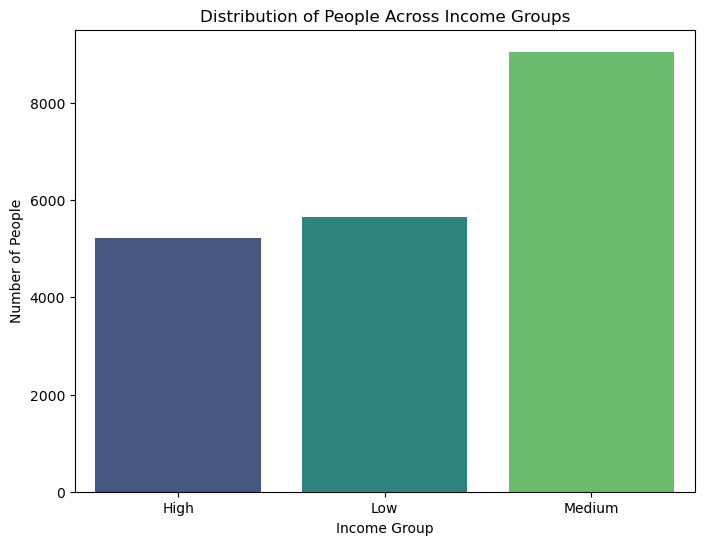

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count how many people fall into each IncomeGroup
group_counts = income_df['IncomeGroup'].value_counts().sort_index()

# Plot the distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, palette='viridis')
plt.xlabel('Income Group')
plt.ylabel('Number of People')
plt.title('Distribution of People Across Income Groups')
plt.show()


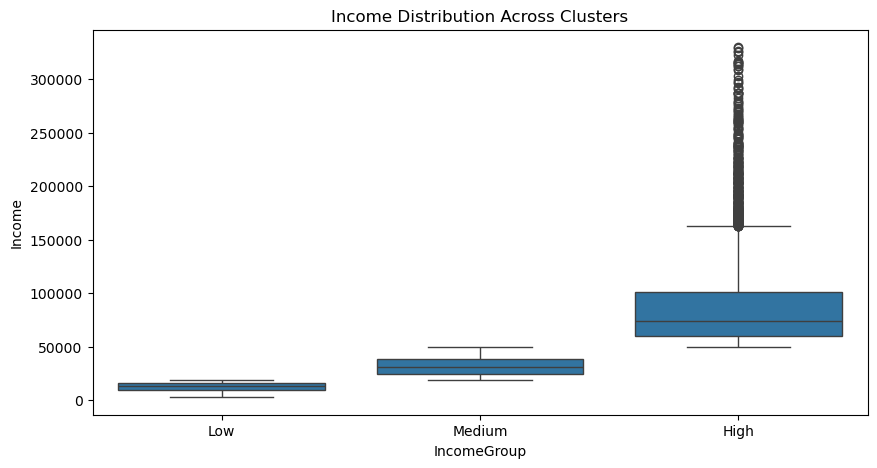

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot (use if you used K-Means - Option 1)
plt.figure(figsize=(10, 5))
sns.boxplot(data=income_df, x='IncomeGroup', y='Income', order=['Low', 'Medium', 'High'])
plt.title('Income Distribution Across Clusters')
plt.show()

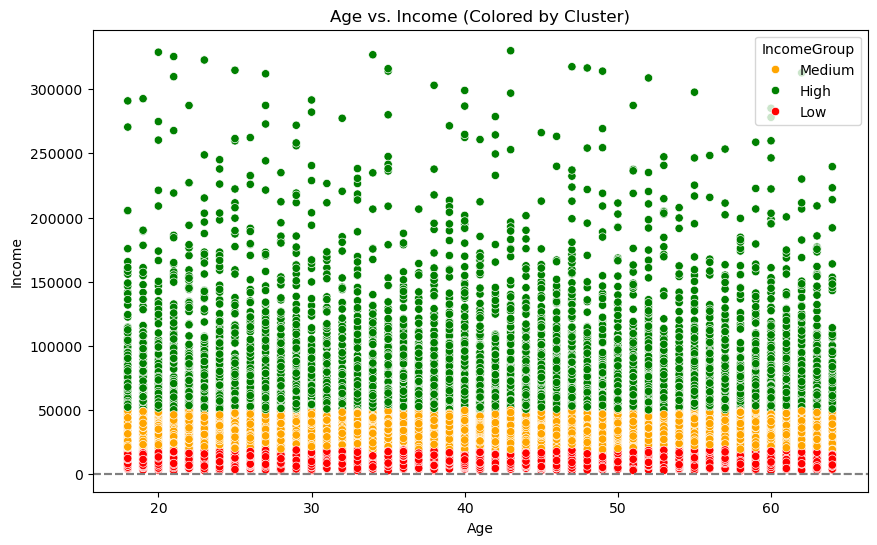

In [127]:
# Scatterplot (to see if age accidentally influenced clustering)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=income_df, 
    x='Age', 
    y='Income', 
    hue='IncomeGroup', 
    palette={'Low':'red', 'Medium':'orange', 'High':'green'}
)
plt.title('Age vs. Income (Colored by Cluster)')
plt.axhline(y=np.log1p(50000), color='gray', linestyle='--')  # Add thresholds if using Option 2/3
plt.axhline(y=np.log1p(100000), color='gray', linestyle='--')
plt.show()

In [128]:
#Despite covering a wide age range (~18 to ~65), income appears randomly distributed across age.
#Both younger and older individuals can be in any income group.

In [129]:
# Create a new column for AgeGroup
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Adult'
    else:
        return 'Older'

income_df['AgeGroup'] = income_df['Age'].apply(categorize_age)


In [130]:
# Average income per age group
avg_income_by_agegroup = income_df.groupby('AgeGroup')['Income'].mean().sort_values()
print(avg_income_by_agegroup)


AgeGroup
Older    40614.971974
Young    41170.219935
Adult    41358.846045
Name: Income, dtype: float64


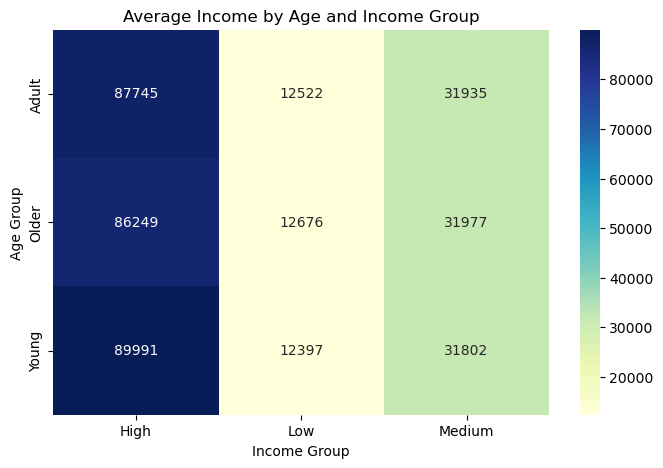

In [131]:
# Grouped average: Income by AgeGroup and IncomeGroup
avg_income_combo = income_df.groupby(['AgeGroup', 'IncomeGroup'])['Income'].mean().unstack()

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(avg_income_combo, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Income by Age and Income Group')
plt.ylabel('Age Group')
plt.xlabel('Income Group')
plt.show()


In [132]:
# Get mapping from encoded value to original occupation name
occupation_map = dict(zip(le_occ.transform(le_occ.classes_), le_occ.classes_))
print(occupation_map)

# Create the crosstab
occupation_income_group_counts = pd.crosstab(income_df['Occupation_encoded'], income_df['IncomeGroup'])

# Rename the index using the mapping
occupation_income_group_counts.index = occupation_income_group_counts.index.map(occupation_map)

# Display the updated table
print(occupation_income_group_counts)


{0: 'Professional', 1: 'Retired', 2: 'Self_Employed', 3: 'Student'}
IncomeGroup         High   Low  Medium
Occupation_encoded                    
Professional        1320  1426    2254
Retired             1275  1395    2330
Self_Employed       1298  1407    2249
Student             1335  1432    2223


In [133]:
# Crosstab: Occupation vs AgeGroup vs IncomeGroup
occupation_age_group = pd.crosstab(
    [income_df['Occupation_encoded'], income_df['AgeGroup']], 
    income_df['IncomeGroup']
)

# Replace occupation codes with labels in the MultiIndex
occupation_age_group.index = occupation_age_group.index.set_levels(
    occupation_age_group.index.levels[0].map(occupation_map), level=0
)

# Display the table
print(occupation_age_group.head(10))


IncomeGroup                  High  Low  Medium
Occupation_encoded AgeGroup                   
Professional       Adult      584  617     978
                   Older      395  458     727
                   Young      341  351     549
Retired            Adult      551  592     960
                   Older      422  457     762
                   Young      302  346     608
Self_Employed      Adult      582  568    1019
                   Older      390  458     670
                   Young      326  381     560
Student            Adult      549  601     920


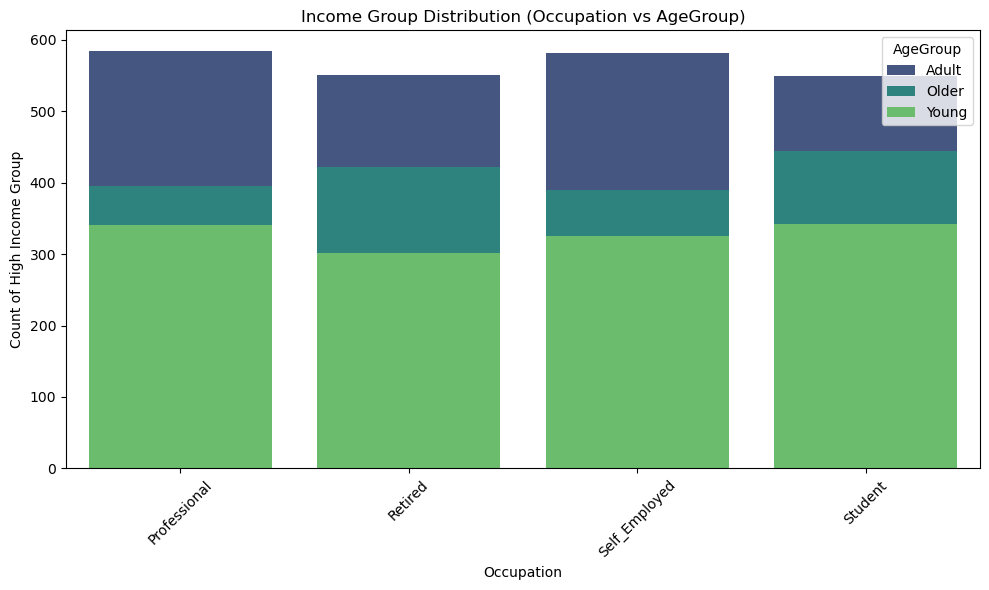

In [134]:
# Resetting the index of occupation_age_group for easier plotting
occupation_age_group_reset = occupation_age_group.reset_index()

# Plot the stacked bar chart for 'IncomeGroup' counts per occupation and age group
plt.figure(figsize=(10, 6))

# Create a stacked bar plot
sns.barplot(
    data=occupation_age_group_reset,
    x='Occupation_encoded', 
    y='High', 
    hue='AgeGroup', 
    dodge=False,
    palette='viridis'
)

# Title and labels
plt.title('Income Group Distribution (Occupation vs AgeGroup)')
plt.xlabel('Occupation')
plt.ylabel('Count of High Income Group')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [135]:
# In Professional, Self-Employed and even Stundents, the Young are group forms the largest portion of the high-income group.
# The Retired category, as expected, has more older individuals, but even there, the young group still has a noticeable count.

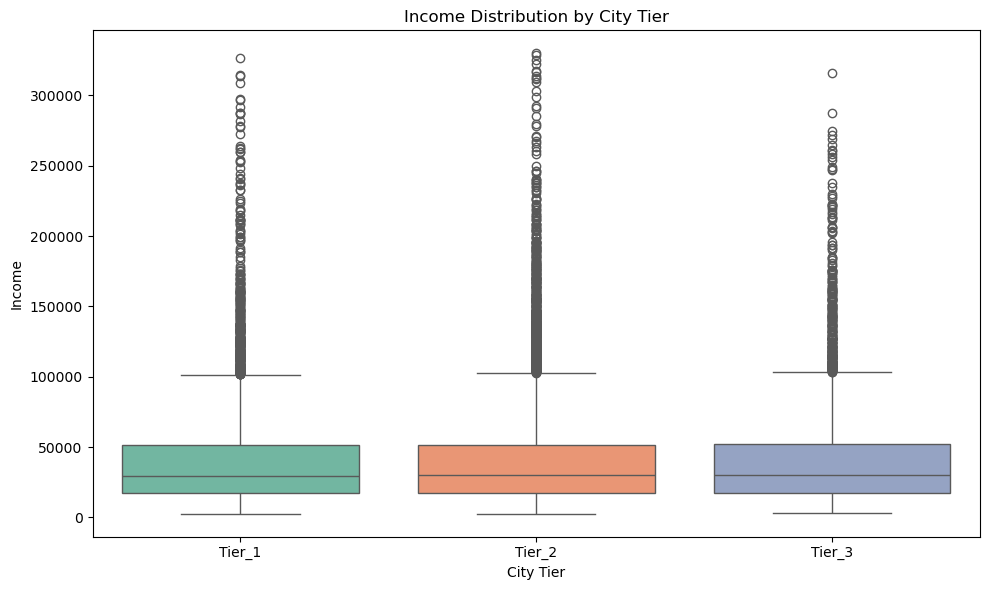

City_Tier_encoded
Tier_2    30416.129636
Tier_3    30164.875255
Tier_1    29749.885356
Name: Income, dtype: float64


In [136]:
#Income Distribution Analysis by City Tier
# Instead of just averaging the income, we can analyze the distribution of income in each city tier. This will help you
# understand the income range in each tier and whether a significant portion of people in that tier can afford EVs.


# Plotting income distribution by city tier
plt.figure(figsize=(10, 6))
sns.boxplot(x='City_Tier_encoded', y='Income', data=income_df, palette='Set2')
plt.title('Income Distribution by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Income')
plt.xticks(ticks=[0, 1, 2], labels=['Tier_1', 'Tier_2', 'Tier_3'])
plt.tight_layout()
plt.show()

# Calculate the median income for each city tier
city_income_median = income_df.groupby('City_Tier_encoded')['Income'].median()

city_tier_map = dict(zip(le_city.transform(le_city.classes_), le_city.classes_))

# Mapping the city tiers to labels
city_income_median.index = city_income_median.index.map(city_tier_map)

# Sorting by median income to see which city tier has the highest median income
city_income_median_sorted = city_income_median.sort_values(ascending=False)

# Display the median income sorted by city tier
print(city_income_median_sorted)


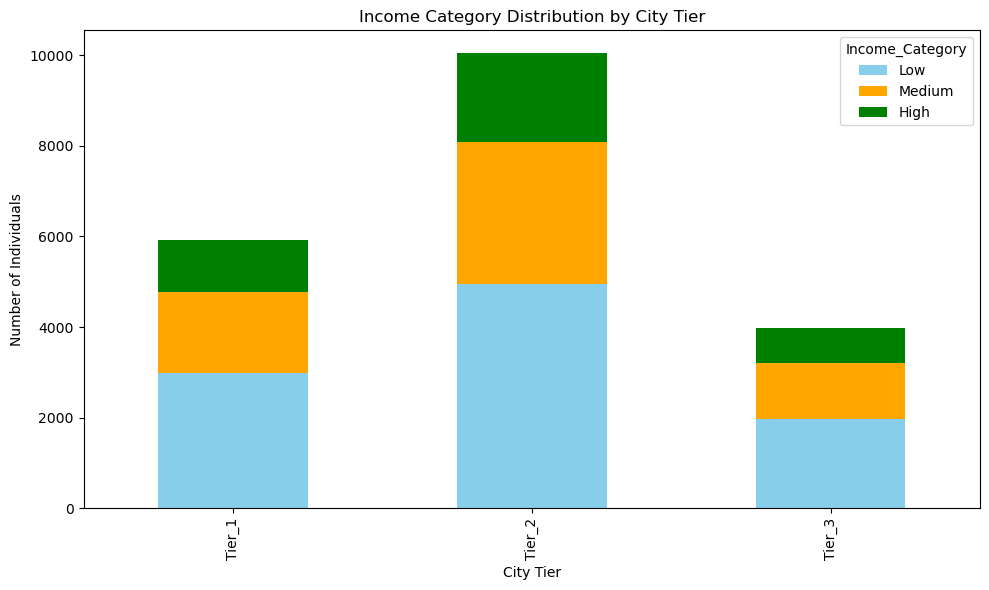

In [137]:
# Targeting Higher Income Segments

# Create income categories (e.g., low, medium, high)
income_df['Income_Category'] = pd.cut(income_df['Income'], bins=[0, 30000, 60000, np.inf], labels=['Low', 'Medium', 'High'])

# Group by city tier and income category to see the distribution
income_category_distribution = income_df.groupby(['City_Tier_encoded', 'Income_Category']).size().unstack()

# Plot the distribution
income_category_distribution.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'orange', 'green'])
plt.title('Income Category Distribution by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Number of Individuals')
plt.xticks(ticks=[0, 1, 2], labels=['Tier_1', 'Tier_2', 'Tier_3'])
plt.tight_layout()
plt.show()


City_Tier_encoded
Tier_3    9567.220914
Tier_2    7972.628085
Tier_1    4793.669952
Name: Disposable_Income, dtype: float64


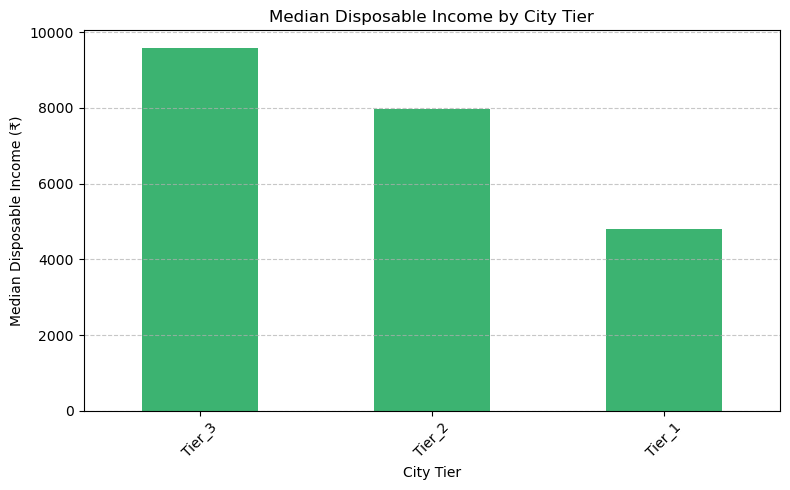

In [138]:
# Purchasing Power in Each Tier
# Disposable income is the amount available after essential expenses. People with higher disposable income are more likely to afford EVs
# Looking at the mean or median disposable income to determine which tier has more purchasing power.

# Grouping by city tier and calculating the median disposable income
city_disposable_income = income_df.groupby('City_Tier_encoded')['Disposable_Income'].median()

# Mapping the city tiers to labels
city_disposable_income.index = city_disposable_income.index.map(city_tier_map)

# Sorting by disposable income to see which city tier has the highest purchasing power
city_disposable_income_sorted = city_disposable_income.sort_values(ascending=False)

# Display the disposable income sorted by city tier
print(city_disposable_income_sorted)

import matplotlib.pyplot as plt

# Plotting the median disposable income by City Tier
plt.figure(figsize=(8, 5))
city_disposable_income_sorted.plot(kind='bar', color='mediumseagreen')
plt.title('Median Disposable Income by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Median Disposable Income (₹)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


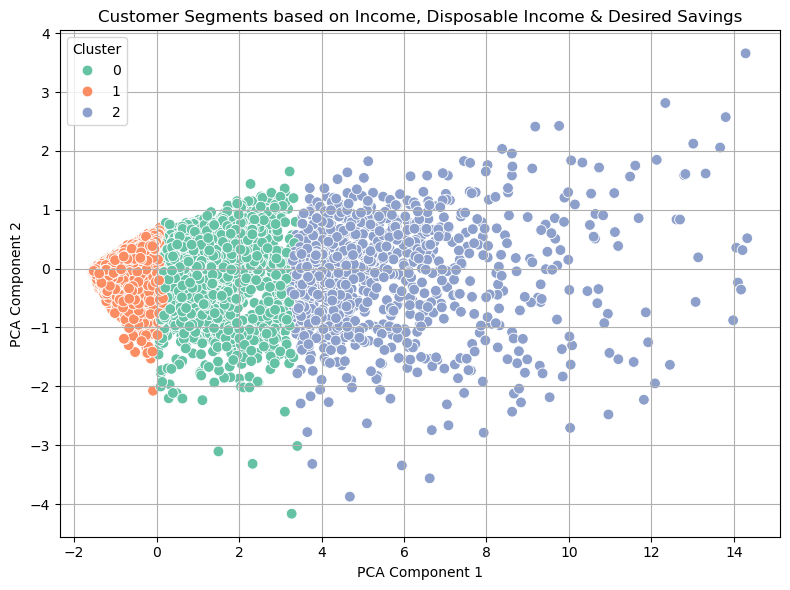

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select features for clustering
features = income_df[['Income', 'Disposable_Income', 'Desired_Savings']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
income_df['Cluster'] = kmeans.fit_predict(scaled_features)


# Optional: Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plotting clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1],
                hue=income_df['Cluster'], palette='Set2', s=60)
plt.title('Customer Segments based on Income, Disposable Income & Desired Savings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


IncomeGroup
Medium    9056
Low       5660
High      5228
Name: count, dtype: int64


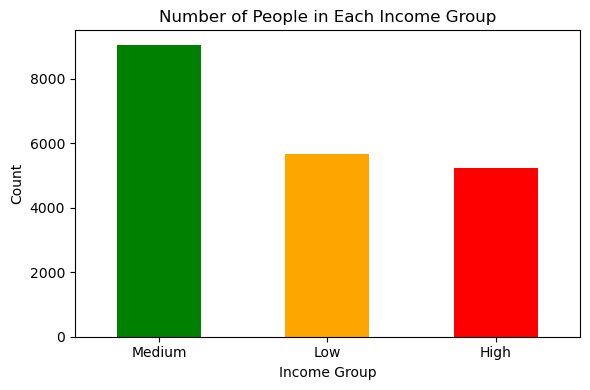

In [140]:
# Count each income group
income_counts = income_df['IncomeGroup'].value_counts()
print(income_counts)
# Plot bar chart
plt.figure(figsize=(6, 4))
income_counts.plot(kind='bar', color=['green', 'orange', 'red'])  # Customize colors if needed
plt.title('Number of People in Each Income Group')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [141]:
cluster_summary = income_df.groupby('Cluster')[['Income', 'Disposable_Income', 'Desired_Savings']].median()
print(cluster_summary)


                Income  Disposable_Income  Desired_Savings
Cluster                                                   
0         62462.261585       16609.062578      7629.504281
1         22038.761489        5046.748632      1552.418058
2        138894.488688       40008.088494     27094.058207


| Cluster | Income (₹) | Disposable Income (₹) | Desired Savings (₹) | Segment Description |
|---------|------------|------------------------|----------------------|----------------------|
| 2       | ₹138,894   | ₹40,008                | ₹27,094              | **High-income segment**: These people earn and save a lot. They're prime targets for premium EV models (SUVs, Sedans). |
| 0       | ₹62,462    | ₹16,609                | ₹7,629               | **Middle-income segment**: Can afford mid-range EVs like electric scooters or bikes. Good early adopters. |
| 1       | ₹22,038    | ₹5,046                 | ₹1,552               | **Low-income segment**: Limited spending capacity. You may not want to target them unless offering very affordable EVs. |


Cluster
0    42.0
1    41.0
2    41.0
Name: Age, dtype: float64


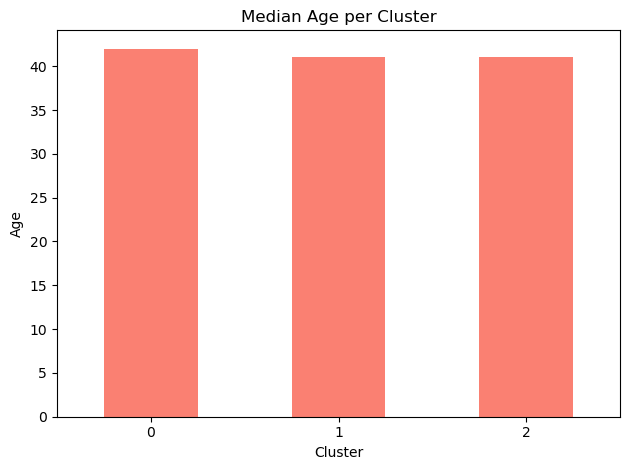

In [142]:
# Median Age for each cluster
cluster_age = income_df.groupby('Cluster')['Age'].median()
print(cluster_age)

# Optional: visualize
import matplotlib.pyplot as plt
cluster_age.plot(kind='bar', color='salmon')
plt.title("Median Age per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [143]:
# All three clusters have similar median ages (~41–42), so age is not a strong differentiator between segments in this case.
# we may want to focus more on income and city tier for targeting.


         Tier_1  Tier_2  Tier_3
Cluster                        
0          1278    2679    1092
1          4439    6821    2623
2           198     543     271


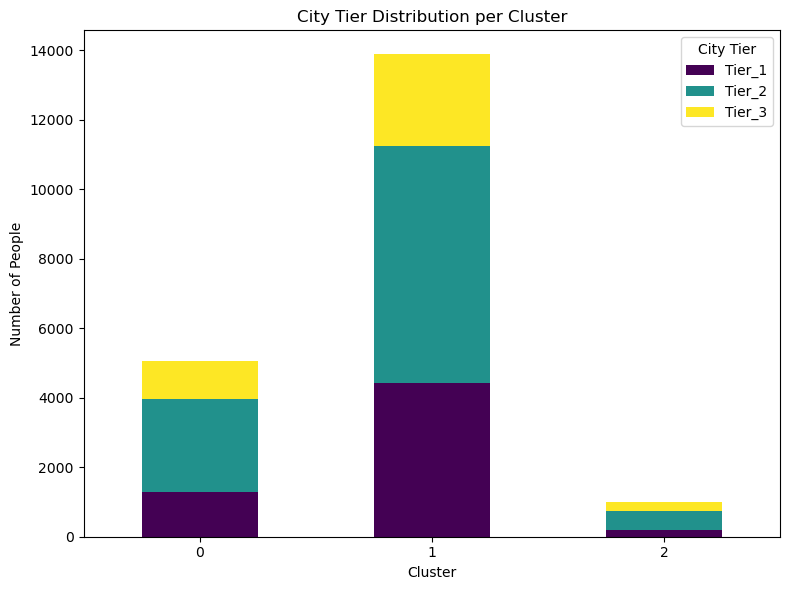

In [144]:
# Count of customers by City_Tier in each cluster
cluster_city_tier = income_df.groupby(['Cluster', 'City_Tier_encoded']).size().unstack()

# Map back encoded values to actual tier labels
cluster_city_tier.columns = [city_tier_map[col] for col in cluster_city_tier.columns]

print(cluster_city_tier)

# Visualize as stacked bar chart
cluster_city_tier.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('City Tier Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='City Tier')
plt.tight_layout()
plt.show()


| **City**   | **Strategy**                                                                         |
|------------|--------------------------------------------------------------------------------------|
| **Tier 1** | Focus on high-income buyers and early adopters for premium EVs.                     |
| **Tier 2** | Target mid-range EVs for a larger urban market with moderate incomes.               |
| **Tier 3** | Focus on affordable, entry-level EVs for price-sensitive customers.                 |


| **City Tier** | **Cluster** | **People** | **Strategy**                                                        |
|---------------|-------------|------------|---------------------------------------------------------------------|
| **Tier 1**    | Cluster 0   | 1278       | Target this with affordable mid-range EVs.                          |
|               | Cluster 1   | 4439       | Focus on premium EVs since they have higher income and are spread across Tier 1 cities. |
|               | Cluster 2   | 198        | This small cluster can be targeted with premium models (likely high-income). |
| **Tier 2**    | Cluster 0   | 2679       | Mid-range EVs with a balance of price and quality.                  |
|               | Cluster 1   | 6821       | Broad focus on mid-range EVs to a large audience.                   |
|               | Cluster 2   | 543        | Affordable EVs with strong value for money.                         |
| **Tier 3**    | Cluster 0   | 1092       | Affordable EVs targeting price-sensitive customers.                 |
|               | Cluster 1   | 2623       | Entry-level EVs for this price-conscious but relatively large group. |
|               | Cluster 2   | 271        | Entry-level EVs for this small but likely high-income group.        |


[ 46808.75854011  16449.97034838 100182.91435766]
[1 0 2]
IncomeGroup
Low       10373
Medium     7638
High       1634
Name: count, dtype: int64


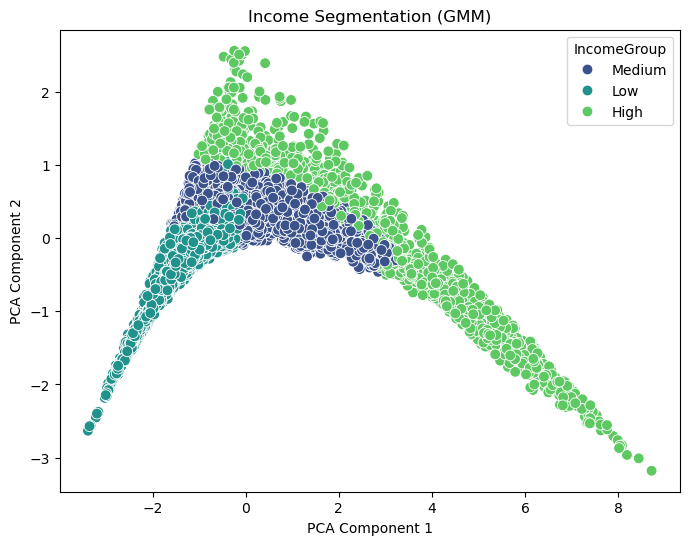

In [145]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
# Load dataset
raw_df = pd.read_excel(r'India Household Spending raw_file.xlsx')

# Select relevant columns for clustering
income_df = raw_df[['Income', 'Age', 'Occupation', 'Disposable_Income', 'Desired_Savings', 'City_Tier']]

# Encode categorical variables
le_occ = LabelEncoder()
le_city = LabelEncoder()

income_df['Occupation_encoded'] = le_occ.fit_transform(income_df['Occupation'])
income_df['City_Tier_encoded'] = le_city.fit_transform(income_df['City_Tier'])

# Drop original categorical columns after encoding
income_df = income_df.drop(['Occupation', 'City_Tier'], axis=1)

# Handle outliers in income using Z-score filtering
from scipy.stats import zscore
income_df = income_df[(np.abs(zscore(income_df['Income'])) < 3)]

# Apply log transformation to Income to reduce skewness
income_df['Log_Income'] = np.log1p(income_df['Income'])

# Scale numerical features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(income_df[['Log_Income', 'Disposable_Income', 'Desired_Savings']])

# Apply Gaussian Mixture Model for Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
income_df['IncomeCluster'] = gmm.fit_predict(scaled_features)

# Label clusters based on income distribution
cluster_centers = np.exp(scaler.inverse_transform(gmm.means_)[:, 0])  # Reverse log transform
sorted_labels = np.argsort(cluster_centers)
income_df['IncomeGroup'] = income_df['IncomeCluster'].map(dict(zip(sorted_labels, ['Low', 'Medium', 'High'])))
print(cluster_centers)
print(sorted_labels)

# Display cluster counts
print(income_df['IncomeGroup'].value_counts())

# PCA for Visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=income_df['IncomeGroup'], palette='viridis', s=60)
plt.title('Income Segmentation (GMM)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

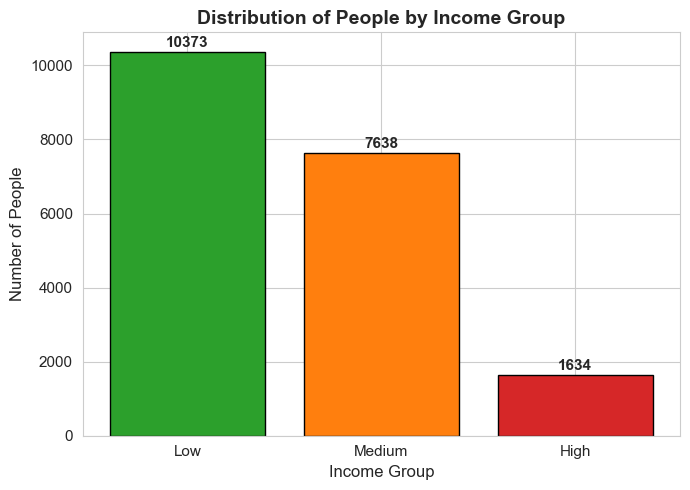

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Count each income group
income_counts = income_df['IncomeGroup'].value_counts()

# Plot
plt.figure(figsize=(7, 5))
bars = plt.bar(income_counts.index, income_counts.values,
               color=['#2ca02c', '#ff7f0e', '#d62728'], edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize plot
plt.title('Distribution of People by Income Group', fontsize=14, fontweight='bold')
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()
